<a href="https://colab.research.google.com/github/elijahmoon-hub/Elijah-s-repository/blob/main/ElijMoonUnit3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SPY  daily % change


In this project, I'm finding the true average of the % change in the SPY Index fund from opening and closing each day. For my data, I downloaded a spreadsheet with the opening and closing values of the stock each day in the past year. I subtracted the closing value from the opening value and found if the stock went up or down and by what percent.

In [57]:
data = pd.read_csv("https://raw.githubusercontent.com/elijahmoon-hub/Elijah-s-repository/refs/heads/main/Unit3/HistoricalData_1759340440919.csv")
data

,Date,Close/Last,Volume,Open,High,Low
0,09/30/2025,666.18,86288030,662.93,666.6500,661.610
1,09/29/2025,663.68,73499020,664.36,665.2800,661.860
2,09/26/2025,661.82,69179210,659.51,662.3700,657.880
3,09/25/2025,658.05,89622070,657.94,659.4056,654.405
4,09/24/2025,661.10,68082230,664.51,664.6100,659.670
...,...,...,...,...,...,...
181,01/08/2025,589.49,47304670,588.70,590.5799,585.195
182,01/07/2025,588.63,60393050,597.42,597.7500,586.780
183,01/06/2025,595.36,47679440,596.27,599.7000,593.600
184,01/03/2025,591.95,37888460,587.53,592.6000,586.430


In [ ]:
!pip install preliz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import preliz as pz
import arviz as az

In [59]:
change = (data["Close/Last"]-data["Open"])/data["Open"] * 100
data.insert(6, "Change (%)", change)
data

,Date,Close/Last,Volume,Open,High,Low,Change (%)
0,09/30/2025,666.18,86288030,662.93,666.6500,661.610,0.490248
1,09/29/2025,663.68,73499020,664.36,665.2800,661.860,-0.102354
2,09/26/2025,661.82,69179210,659.51,662.3700,657.880,0.350260
3,09/25/2025,658.05,89622070,657.94,659.4056,654.405,0.016719
4,09/24/2025,661.10,68082230,664.51,664.6100,659.670,-0.513160
...,...,...,...,...,...,...,...
181,01/08/2025,589.49,47304670,588.70,590.5799,585.195,0.134194
182,01/07/2025,588.63,60393050,597.42,597.7500,586.780,-1.471327
183,01/06/2025,595.36,47679440,596.27,599.7000,593.600,-0.152615
184,01/03/2025,591.95,37888460,587.53,592.6000,586.430,0.752302


(array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  3.,  5., 11., 21., 32., 47.,
        37., 16.,  5.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([-4.86337332, -4.46222105, -4.06106879, -3.65991653, -3.25876426,
        -2.857612  , -2.45645973, -2.05530747, -1.6541552 , -1.25300294,
        -0.85185068, -0.45069841, -0.04954615,  0.35160612,  0.75275838,
         1.15391064,  1.55506291,  1.95621517,  2.35736744,  2.7585197 ,
         3.15967197,  3.56082423,  3.96197649,  4.36312876,  4.76428102,
         5.16543329,  5.56658555,  5.96773782,  6.36889008,  6.77004234,
         7.17119461,  7.57234687,  7.97349914,  8.3746514 ,  8.77580366,
         9.17695593,  9.57810819,  9.97926046, 10.38041272, 10.78156499,
        11.18271725]),
 <BarContainer object of 40 artists>)

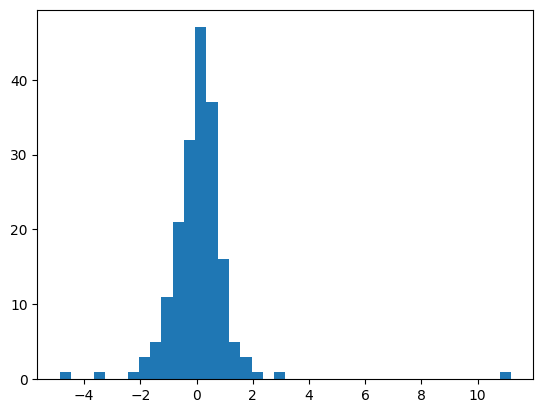

In [60]:
plt.hist(data["Change (%)"],40)

The histogram is centered around 0, adhering to the tpyical deviation of a stock where the change in stock averages almost 0% over time. The percent change across each day is most commonly between -2% and 2% with a few outliers.

<Axes: >

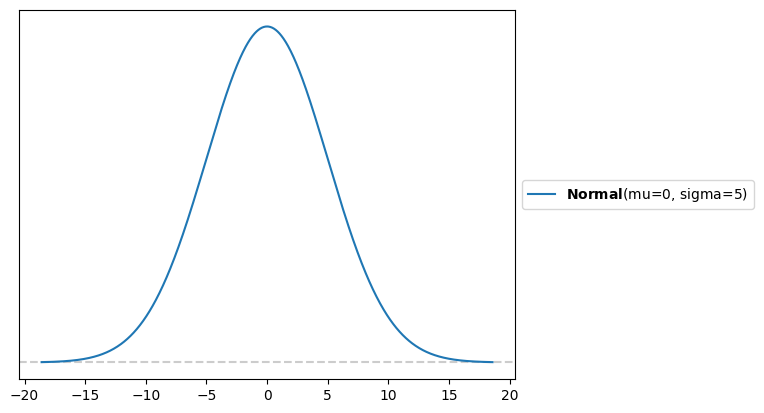

In [61]:
pz.Normal(0, 5).plot_pdf()

The percents changes of the SPY stock everyday are either negative or positive, with a mean rate of change of 0%. The normal distribution contains positive and negative values, being more likely as they approach 0 from the positive or negative side.

<Axes: >

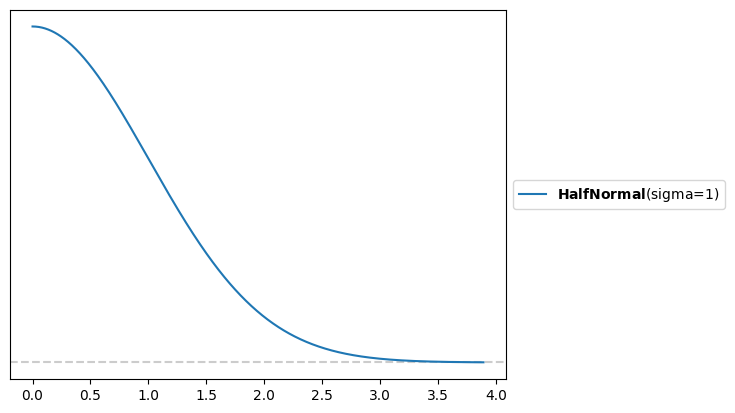

In [62]:
pz.HalfNormal(1).plot_pdf()

I used a Half Normal distribution here as my standard deviation can't be a negative value. The lowest value is 0 and is most commonly around 0, with sigma decreasing as the x values increase.

<Axes: >

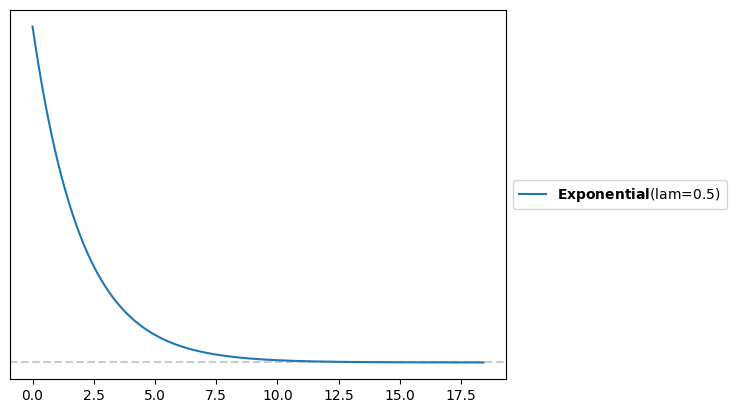

In [63]:
pz.Exponential(0.5).plot_pdf()

The exponential distribution distributes the values more towards the lower values, therefore is best for my posterior as most days have percent changes less than -/+2.5

In [ ]:
with pm.Model() as model:
    μ = pm.Normal('μ', 0, 10)

    σ = pm.HalfNormal('σ',1)

    n = pm.Exponential('n', .5)
    Y = pm.StudentT('Y', nu = n, mu = μ, sigma = σ, observed=data["Change (%)"])
    idata = pm.sample()

Output()

(-10.0, 10.0)

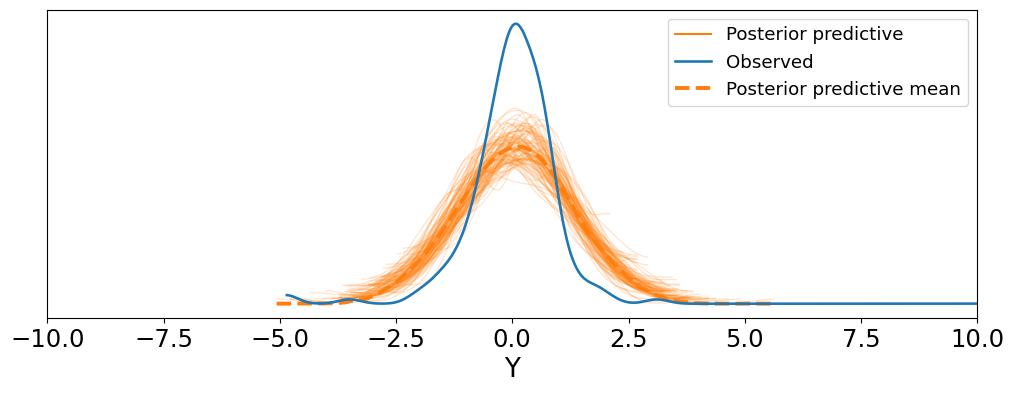

In [65]:
pm.sample_posterior_predictive(idata2, model=model2, extend_inferencedata=True)
ax = az.plot_ppc(idata2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(-10, 10)

This is the posterior excluding the exponential distribution. Due to the ineffective priors, the posterior prediction didn't match the observed data as well and the y-axis values weren't high enough.

In [ ]:
with pm.Model() as model2:
    μ = pm.Normal('μ', 0, 10)

    σ = pm.HalfNormal('σ',1)

    n = pm.Exponential('n', .5)
    Y = pm.Normal('Y', mu = μ, sigma = σ, observed=data["Change (%)"])
    idata2 = pm.sample()

Output()

(-10.0, 10.0)

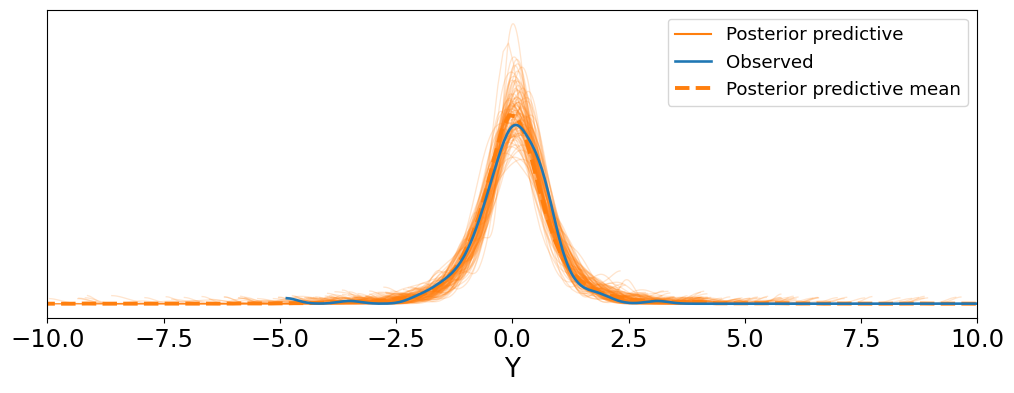

In [67]:
pm.sample_posterior_predictive(idata, model=model, extend_inferencedata=True)
ax = az.plot_ppc(idata, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(-10, 10)